In [1]:
# import ray
# runtime_env = {"working_dir": "/home/bdp23/work/ahmad/german_analysis_after_tfidf", "pip": ["numpy"]}

# # Let's start Ray
# if ray.is_initialized():
#     ray.shutdown()
# ray.init("ray://localhost:10001", runtime_env = runtime_env)

In [2]:
# cluster_resources = ray.cluster_resources()
# print("Cluster resources:", cluster_resources)

In [3]:
# node_info = ray.nodes()
# print("Node info:")
# for node in node_info:
#     print("Node ID:", node["NodeID"])
#     print("Node IP:", node["NodeManagerAddress"])
#     print("Node resources:", node["Resources"])
#     print("--------")


In [4]:
# %pip install conllu
# %pip install https://huggingface.co/spacy/de_core_news_md/resolve/main/de_core_news_md-any-py3-none-any.whl
# %pip install https://huggingface.co/spacy/fr_core_news_md/resolve/main/fr_core_news_md-any-py3-none-any.whl
# %pip install wheel
# %pip install bertopic
# %pip install nltk
# %pip install scikit-learn
# %pip install sentence-transformers
# %pip install cudf-cu11 cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [1]:
# !pip install spacy

In [1]:
import spacy
import os
import json
import pandas as pd
import pickle5 as pickle

In [8]:
# def read_conllu(file):
#     """
#     open txt file in CoNLL-U format, and parse it with conllu package
#     Input: Text-file in CoNLL-U format (.txt)
#     Output: TokenList
#     """
#     with open(file, encoding = 'utf-8') as f:
#         txt = f.read() 
#     parsed_data = parse(txt)
#     return parsed_data

In [9]:
# def create_article(token_list):
#     """
#     creates list of tokens for one article, uses list compreshension to get words
#     Input: TokenList
#     Output: list
#     """
#     article = []
#     for sentence in token_list:
#         tokens = [token['form'] for token in sentence]
#         article.extend(tokens)
#     return article

In [10]:
# def stringify(list):
#     # This function joins all tokens in a list to a string
#     return " ".join(list)

In [11]:
# def filepaths_newspaper(directory):
#     """
#     Helper function to get filepaths for data loading, depends on original file structure:
#     --> Newspaper / year / subdir / articles.txt
#     Input: path to directory, i.e. path until newspaper short name
#     Output: dictionary with paths, packaged by year
#     """
#     paths = {}
#     years = os.listdir(directory)
#     for year in years:
#         sub_directories = os.listdir(os.path.join(directory, year))
#         paths[year] = []
        
#         for subdir in sub_directories:
#             files = [os.path.join(directory, year, subdir, file) for file in os.listdir(os.path.join(directory, year, subdir)) if file.endswith(".txt")]
#             paths[year].extend(files)
            
#     return paths

In [12]:
# def read_files(paths):
#     """
#     Function that reads and processes the articles for one specific newspaper
#     If files are corrupted and yield a ParsingError, the filepath is saved in the errors list
#     Input: dictionary with paths to all files, divided by year (keys)
#     Output: dictionary packaged by years, containing 2-d array with lists of tokens (one list per article), error list
#     """
#     corpus = {}
#     errors = []
#     print('\n ---  start loading ---')
    
#     for year in paths.keys():
#         corpus[year] = []
        
#         for file in paths[year]:
#             try:
#                 data = read_conllu(file)
#                 article = create_article(data)
#                 corpus[year].append(article)
                
#             except:
#                 print('error in: ', file)
#                 erros.append(file)
                
#         print(year, ' processed')
    
#     print('---  completed loading ---')
    
#     return corpus, errors

In [13]:
# def save_corpus(corpus_newspaper, filename):
#     """
#     This function saves a newspaper corpus to a json file
#     Input: dictionary like corpus, filename: name.json
#     Output: json file
#     """
#     with open(filename, "w") as outfile:
#         json.dump(corpus_newspaper, outfile)
        
#     print('--- completed saving: ', filename, '---')

In [14]:
# def read_json_corpus(path):
#     """
#     This function reads a newspaper corpus from json file
#     Input: path to json file
#     Output: dictionary
#     """
#     with open(path, "r") as json_file:
#         data = json.load(json_file)
        
#     return data

In [15]:
# def create_dataframe(data_dict, newspaper):
#     """
#     This function creates a pandas df out of a dictionary like corpus produced by read_files()
#     Input: dict like, json or python dict
#     Output: Pandas df
#     """
#     # Extract keys (years) and values (2-dimensional lists) from the dictionary
#     years = []
#     texts = []
#     for year, values in data_dict.items():
#         for value in values:
#             years.append(year)
#             texts.append(value)
    
#     # Create a dataframe using pandas
#     df = pd.DataFrame({'text': texts, 'year': years, 'newspaper': newspaper})
    
#     return df

In [2]:
german_newspapers=['NZZ',  'BZ', 'BU', 'BAZ', 'TA']

In [3]:
french_newspapers=['TLM', 'TDG','HEU','TPS']

In [4]:
# dfs = []
# for media in german_newspapers:
#     data = read_json_corpus(f'{media}.json')
#     df = create_dataframe(data, media)
#     del data
#     dfs.append(df)
# # create full dataframe with german newspapers
# df_full_german = pd.concat(dfs, axis = 0)
# df_full_german.head(10)

In [5]:
# dfs = []
# for media in french_newspapers:
#     data = read_json_corpus(f'{media}.json')
#     df = create_dataframe(data, media)
#     del data
#     dfs.append(df)
# # create full dataframe with french newspapers
# df_full_french = pd.concat(dfs, axis = 0)
# df_full_french.head(10)

In [6]:
#The undersampled DATA: 5(german newspapers)* 200(articles) * 25 (years not including 1996, 1997 )

In [4]:
# # Load the CSV file into a DataFrame
# undersampled_data = pd.read_csv('undersampled_data_german.csv')


# Load undersampled data from the pickled object
with open('df_bank_french_tfidf.pkl', 'rb') as f:
    undersampled_data = pickle.load(f)

# Now you can work with the loaded DataFrame
# For example, you can print the first few rows:
print(undersampled_data.head(10))

                                                 text  year newspaper
3   cherix président de renaissance suisse europe ...  1998       HEU
8   dbm  drake beam morin  se présente comme le le...  1998       HEU
11  pieds et poings liés  les betteraviers de la b...  1998       HEU
17  le premier ministre israélien benjamin netanya...  1998       HEU
22  ce ne sont pas les rebondissements qui manquen...  1998       HEU
29  le credit suisse ne semble plus guère redouter...  1998       HEU
30  la faillite de la société ifosa à blonay a été...  1998       HEU
32  avec l ouverture de les marchés publics cestàd...  1998       HEU
40  les partis bourgeois représentés à le conseil ...  1998       HEU
47  alors que le bâtiment de la marine américaine ...  1998       HEU


In [5]:
len(undersampled_data)

29130

In [6]:
undersampled_data.iloc[10000]

text          après plusieurs mois d hésitation  la réserve...
year                                                      2016
newspaper                                                  TDG
Name: 60968, dtype: object

In [7]:
# nlp = spacy.load("de_core_news_md")
# nlp = spacy.load("fr_core_news_md")

In [13]:
# %pip install gensim

In [8]:
import nltk
import numpy as np
#import gensim
#from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
# Download the stopwords from nltk
#nltk.download('stopwords')

In [9]:
from nltk.corpus import stopwords
import spacy

# Load the spaCy models for German
nlp_german = spacy.load('de_core_news_md', disable=['tagger', 'parser', 'ner'])
nlp_french = spacy.load('fr_core_news_md')

# Get the stopwords for German, French, and English
stop_words_german = set(stopwords.words('german'))
stop_words_french = set(stopwords.words('french'))
stop_words_english = set(stopwords.words('english'))

/Users/ahmadstudy/opt/anaconda3/envs/nlp_4/lib/python3.7/site-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['tagger', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [11]:
# Function to perform the pre-processing steps on the entire dataset

# Function to preprocess a single document
def preprocess_single_doc(doc):
    return ' '.join([token.text.lower() for token in doc if token.text.lower() not in stop_words_french and len(token.text) > 3])




In [23]:
# print(preprocess_single_doc("Der Himmel war von dichten Wolken bedeckt, während der Wind sanft durch die Bäume strich. Einige Vögel zwitscherten fröhlich im Hintergrund. Die Blumen blühten in leuchtenden Farben und versprühten ihren betörenden Duft. In der Ferne konnte man das Rauschen eines Flusses hören. Die Natur war in voller Pracht. Es war ein idyllischer Tag, perfekt zum Entspannen und die Schönheit der Umgebung zu genießen."))

In [12]:
# Preprocess all the texts using SpaCy's pipe function for faster batch processing
chunk_size = 1000  # adjust as necessary
processed_docs_german = []
for i in range(0, len(undersampled_data['text']), chunk_size):
    print(i,end='')
    chunk = undersampled_data['text'][i:i+chunk_size]
    processed_chunk= list(nlp_french.pipe(chunk, batch_size=25))
    processed_docs_german.extend(processed_chunk)

01000200030004000500060007000800090001000011000120001300014000150001600017000180001900020000210002200023000240002500026000270002800029000

In [13]:
preprocess_single_doc(processed_docs_german[0])

'cherix président renaissance suisse europe euro certes laborieux compromis présidence banque centrale européenne marqué cette naissance fait monnaie unique devient réalité revenir enjeux événement bien plutôt interroger manière dont suisse perçu penser saluée cette étape marque clairement volonté abandonner économie seuls jeux places financières nationales surtout pays regrette souvent déficit politique construction européenne aucuns tirer parallèle unification monnaies helvétiques 1848 plus incisif autres rappeler propos grands experts financiers dont certains affirmaient récemment encore euro verrait jour tous paru logique pays fait compromis onzième commandement accueille relative compréhension négociations difficiles accompagnant fait politique majeur rien tout cela deux côtés sarine majorité médias choisi critiquer manière dont histoire faite plutôt souligner portance histoire ellemême apres marchandages marchandages indignes comportement marchands tapis crédit euro entamé quelqu

In [14]:
# Map the preprocessed Docs to their respective strings
# processed_docs_german = [preprocess_single_doc(doc) for doc in processed_docs_german]
# Map the preprocessed Docs to their respective strings with progress tracking
processed_docs_german_tokenized = []
for i, doc in enumerate(processed_docs_german):
    processed_docs_german_tokenized.append(preprocess_single_doc(doc))
    if (i+1) % 10000 == 0:  # For every 10,000 documents processed
        print(f"Processed {i+1} documents")

Processed 10000 documents
Processed 20000 documents


In [15]:
import pandas as pd

# Convert the flat list to a list of lists
processed_docs_german_tokeniz = [[item] for item in processed_docs_german_tokenized]

df = pd.DataFrame(processed_docs_german_tokeniz)

# Now, you can use the .head() method
df = df.rename(columns={0: 'text'})
df.head(10)


,text
0,cherix président renaissance suisse europe eur...
1,drake beam morin présente comme leader mondial...
2,pieds poings liés betteraviers broye fâchés fa...
3,premier ministre israélien benjamin netanyahou...
4,rebondissements manquent affaire biodépollutio...
5,credit suisse semble plus guère redouter insta...
6,faillite société ifosa blonay prononcée semain...
7,ouverture marchés publics cestàdire retour lib...
8,partis bourgeois représentés conseil fédéral c...
9,alors bâtiment marine américaine grapple prépa...


In [16]:
len(df)

29130

In [17]:
# Save the processed_docs_german object to a file
with open('processed_docs_french.pkl', 'wb') as f:
    pickle.dump(df, f)

41110

In [18]:
from bertopic import BERTopic 
import hdbscan
from umap import UMAP
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sentence_transformers import SentenceTransformer 


modelBert = BERTopic(top_n_words=15 ) 

ModuleNotFoundError: No module named 'cuml'

In [31]:
# processed_docs_german_for_bertopic=processed_docs_german

In [32]:
# processed_docs_german_for_bertopic = processed_docs_german_for_bertopic.reset_index(drop=True)

In [33]:
# processed_docs_german_for_bertopic.head(10)

0    er_old einkommen allg steuern reichtum einkomm...
1    er_old korruption bank allg wirtschaftskrimina...
2    er_old fussball fussball soccer finanzen einko...
3    _old wirtschaftskriminalität kapitalmarkt post...
4    er_old versicherung lebensversicherungsgewerbe...
5    _old fernsehanstalt fernsehprogramm fussball f...
6    er_old staatsverfassung sozialversicherung arb...
7    er_old übersicht fussball fernsehprogramm werb...
8    _old wirtschaftskriminalität kapitalmarkt wirt...
9    er_old eislaufen eiskunstlauf eistanz sponsori...
Name: text, dtype: object

In [35]:
# len(processed_docs_german_for_bertopic)

41110

In [34]:
# processed_docs_german_for_bertopic.iloc[10000]

'basler bankrat basler grosse mittwoch ständerätin anita fetz 13köpfigen bankrat basler kantonalbank bestätigt politikerin stiess wegen verwicklung spendenaffäre stiftung facile geschlossenen widerstand bürgerlichen zweiten wahlgang kantonalpräsident beat jans betonte pressekonferenz fetz niemand schaden gekommen financier dieter behring irgendwelche geschäftlichen kontakte gepflegt system weiterempfohlen teil kolportiert worden fetz opfer medienkampagne hexenjagd mehr frau abgeschossen worden seite'

In [36]:
# topics, probs = modelBert.fit_transform(processed_docs_german_for_bertopic)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [37]:
# modelBert.get_topic_info()

,Topic,Count,Name
0,-1,19721,-1_mehr_franken_schweiz_bank
1,0,776,0_bank_kantonalbank_reuters_privatbank
2,1,715,1_milliarden_dollar_franken_millionen
3,2,566,2_russland_russischen_putin_russische
4,3,511,3_inflation_teuerung_geldpolitik_zinsen
...,...,...,...
321,320,10,320_berset_orik_berisha_sollaku
322,321,10,321_pieper_franke_merrill_thain
323,322,10,322_postgesellschaft_identitt_sign_telefongese...
324,323,10,323_saffa_preiswerk_gfeller_hamers


In [45]:
# # #-1 is the outlier
# modelBert.get_topic(1)

[('milliarden', 0.018936520093871423),
 ('dollar', 0.007194108431531559),
 ('franken', 0.006456921169619523),
 ('millionen', 0.004736313342115844),
 ('prozent', 0.004681428963470421),
 ('adani', 0.0038408865394766044),
 ('nationalbank', 0.0038392418502122554),
 ('milliarde', 0.0038353722986460637),
 ('rund', 0.0036148485415916955),
 ('gewinn', 0.003390979456405935),
 ('jahr', 0.0032373263585794457),
 ('axpo', 0.003168922690125031),
 ('bund', 0.0029521028279561588),
 ('fonds', 0.0028273488960904917),
 ('gestern', 0.0027372212082696122)]

In [42]:
# german_docs_and_their_topic=modelBert.get_document_info(processed_docs_german_for_bertopic)

In [43]:
# german_docs_and_their_topic

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,er_old einkommen allg steuern reichtum einkomm...,171,171_allg_versicherung_politisches_politique,allg - versicherung - politisches - politique ...,0.990597,False
1,er_old korruption bank allg wirtschaftskrimina...,-1,-1_mehr_franken_schweiz_bank,mehr - franken - schweiz - bank - prozent - sc...,0.000000,False
2,er_old fussball fussball soccer finanzen einko...,108,108_fussball_soccer_sport_football,fussball - soccer - sport - football - versich...,1.000000,True
3,_old wirtschaftskriminalität kapitalmarkt post...,-1,-1_mehr_franken_schweiz_bank,mehr - franken - schweiz - bank - prozent - sc...,0.000000,False
4,er_old versicherung lebensversicherungsgewerbe...,154,154_versicherung_versicherungsgewerbe_statisti...,versicherung - versicherungsgewerbe - statisti...,0.510051,False
...,...,...,...,...,...,...
41105,gespräch jahreswechsel inflation krieg klima 2...,3,3_inflation_teuerung_geldpolitik_zinsen,inflation - teuerung - geldpolitik - zinsen - ...,1.000000,False
41106,umfrage bank verlangte kundinnen kunden daten ...,-1,-1_mehr_franken_schweiz_bank,mehr - franken - schweiz - bank - prozent - sc...,0.000000,False
41107,ersten blick grösste schweizer bank 2022 glanz...,-1,-1_mehr_franken_schweiz_bank,mehr - franken - schweiz - bank - prozent - sc...,0.000000,False
41108,verlust schweizer grossbank credit suisse grös...,-1,-1_mehr_franken_schweiz_bank,mehr - franken - schweiz - bank - prozent - sc...,0.000000,False


In [ ]:
# german_docs_and_their_topic.dtypes

In [43]:
# # # Save data as a pickled object
# with open('german_docs_and_their_topic.pkl', 'wb') as f:
#     pickle.dump(german_docs_and_their_topic, f)

In [44]:
# import numpy as np

# year = undersampled_data['year'].values
# newspaper = undersampled_data['newspaper'].values
# Document=german_docs_and_their_topic['Document'].values
# Topic=german_docs_and_their_topic['Topic'].values
# Name=german_docs_and_their_topic['Name'].values
# Top_n_words=german_docs_and_their_topic['Top_n_words'].values
# Probability=german_docs_and_their_topic['Probability'].values



# valid_indices = np.where((Topic <= 4) & (Topic >= 0))[0]
# year = year[valid_indices]
# newspaper = newspaper[valid_indices]
# Document = Document[valid_indices]
# Topic = Topic[valid_indices]
# Name = Name[valid_indices]
# Top_n_words = Top_n_words[valid_indices]
# Probability = Probability[valid_indices]

# # Create DataFrame for undersampled data
# filted_dataset_after_topic_modeling = pd.DataFrame({'document': Document, 'year': year, 'newspaper': newspaper, 'topic': Topic, 'name': Name, 'top_n_words': Top_n_words, 'probability': Probability})


In [60]:
# # Save data as a pickled object
# with open('filted_dataset_after_topic_model_german.pkl', 'wb') as f:
#     pickle.dump(filted_dataset_after_topic_modeling, f)

In [82]:
# # Load undersampled data from the pickled object
# with open('filted_dataset_after_topic_model_german.pkl', 'rb') as f:
#     filted_dataset_after_topic_model = pickle.load(f)

In [83]:
print(len(filted_dataset_after_topic_model))
filted_dataset_after_topic_model

2778


,document,year,newspaper,topic,name,top_n_words,probability
0,er_old architektur film raumplanung bauwerk al...,1998,BAZ,4,4_film_kino_regisseur_festival,film - kino - regisseur - festival - geschicht...,0.784174
1,er_old bank allg geschichte aussenwirtschaft a...,1998,BAZ,3,3_bank_kunde_credit_suisse,bank - kunde - credit - suisse - finma - mrd -...,1.000000
2,er_old musik konzert schweiz kulturwerkstatt k...,1998,BAZ,0,0_musik_konzert_band_musiker,musik - konzert - band - musiker - song - musi...,1.000000
3,er_old versicherung kapitalmarkt versicherungs...,1998,BAZ,3,3_bank_kunde_credit_suisse,bank - kunde - credit - suisse - finma - mrd -...,0.615956
4,film verbrechen allg regisseur kriminelle vere...,1998,BAZ,4,4_film_kino_regisseur_festival,film - kino - regisseur - festival - geschicht...,0.725939
...,...,...,...,...,...,...,...
2773,bank aktienkurs credit suisse gestern historis...,2023,TA,3,3_bank_kunde_credit_suisse,bank - kunde - credit - suisse - finma - mrd -...,1.000000
2774,geplant taxiservice person behinderung jung ka...,2023,TA,1,1_bahn_autobahn_bahnhof_auto,bahn - autobahn - bahnhof - auto - verkehr - t...,1.000000
2775,transport mann führen regiobahn tier anzeige e...,2023,TA,1,1_bahn_autobahn_bahnhof_auto,bahn - autobahn - bahnhof - auto - verkehr - t...,1.000000
2776,soulsängerin aretha franklin respect führen ak...,2023,TA,0,0_musik_konzert_band_musiker,musik - konzert - band - musiker - song - musi...,0.640472


In [84]:
probability=filted_dataset_after_topic_model['probability'].values
valid_indices = np.where((probability>= 0.5))[0]
len(valid_indices)#So all the probabilities are above 0.5

2675

In [102]:
print(filted_dataset_after_topic_model.loc[(filted_dataset_after_topic_model['topic'] ==3),'top_n_words'][1])

bank - kunde - credit - suisse - finma - mrd - aktie - geld - grossbank - kantonalbank - institut - franken - banking - prozent - schweizer


In [85]:
import pandas as pd

# Assuming your dataframe is named 'df'
filtered_df = filted_dataset_after_topic_model.loc[(filted_dataset_after_topic_model['topic'] >= 0) & (filted_dataset_after_topic_model['topic'] <= 10)]

In [86]:
grouped_df = filtered_df.groupby(['year', 'topic']).size().reset_index(name='document_count')

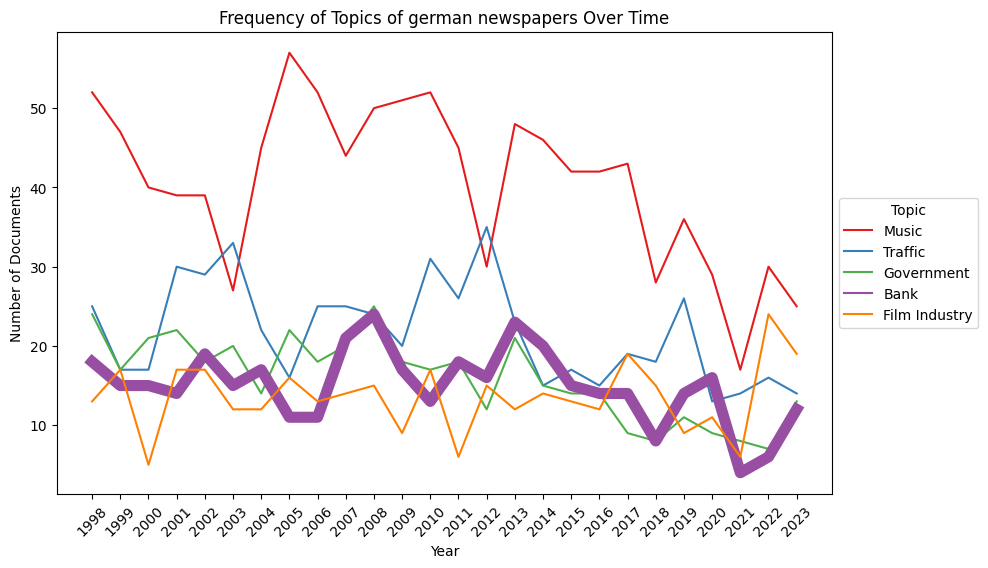

<Figure size 640x480 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map topic numbers to names
topic_names = {
    0: 'Music',
    1: 'Traffic',
    2: 'Government',
    3: 'Bank',
    4: 'Film Industry'
}

# Set the color palette
color_palette = sns.color_palette('Set1', n_colors=5)

# Create a custom legend handle with the corresponding colors
legend_handles = [plt.Line2D([], [], color=color_palette[i], label=topic_names[i]) for i in topic_names.keys()]



# Plot the line plot
plt.figure(figsize=(10, 6))
ax=sns.lineplot(data=grouped_df, x='year', y='document_count', hue='topic', palette=color_palette)
plt.title('Frequency of Topics of german newspapers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Documents')

# Highlight the line for the 'Bank' topic
bank_topic_color = color_palette[3]  # Get the color for the 'Bank' topic
bank_line = ax.get_lines()[3]  # Get the line object for the 'Bank' topic
bank_line.set_color(bank_topic_color)
bank_line.set_linewidth(8)

# Add the custom legend handle
plt.legend(title='Topic', handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()
plt.savefig('topic_trend_plot.png', bbox_inches='tight')


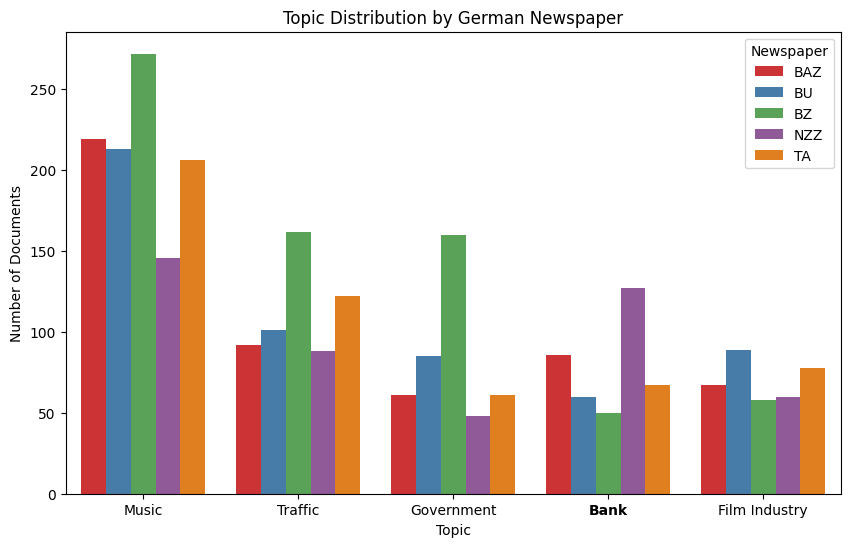

<Figure size 640x480 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Create a dictionary to map topic numbers to names
topic_names = {
    0: 'Music',
    1: 'Traffic',
    2: 'Government',
    3: 'Bank',
    4: 'Film Industry'
}

# Set the color palette
color_palette = sns.color_palette('Set1', n_colors=5)

# Group the dataframe by topic and language and count the number of documents
grouped_df = filtered_df.groupby(['topic', 'newspaper']).size().reset_index(name='document_count')

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_df, x='topic', y='document_count', hue='newspaper', palette=color_palette)
plt.title('Topic Distribution by German Newspaper')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.legend(title='Newspaper')

# Highlight the 'Bank' xtick
bank_xtick_index = 3  # Index of 'Bank' xtick
bank_xtick_label = topic_names[bank_xtick_index]  # Label for 'Bank' xtick
bank_xtick = plt.gca().xaxis.get_ticklabels()[bank_xtick_index]  # Get 'Bank' xtick label
bank_xtick.set_fontweight('bold')  # Set font weight to bold
bank_xtick.set_fontproperties(fm.FontProperties(weight='bold'))  # Set font properties to bold

# Set the x-axis tick labels to topic names
plt.xticks(ticks=range(len(topic_names)), labels=[topic_names[i] for i in range(len(topic_names))])

plt.show()
plt.savefig('topic_newspaper_trend_plot.png', bbox_inches='tight')
